# A first simple model

In [91]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
df_merged = pd.read_csv("../data/chlamydia_cdc_census.csv")
df_merged.head()

,Unnamed: 0,FIPS,Population,Cases,hd01s001,hd02s002,hd02s003,hd02s004,hd02s005,hd02s006,...,hd01s167,hd01s168,hd02s181,hd02s184,hd01vd01,d002,d014,d019,d024,d029
0,0,1001,55246,220,4.736962,6.6,7.3,7.9,7.9,5.6,...,2.68,3.13,75.4,24.6,52475,0.562138,0.003017,0.020029,0.002868,0.017704
1,1,1003,195540,667,5.260703,6.1,6.4,6.5,6.4,5.2,...,2.46,2.93,72.5,27.5,50183,0.545409,0.002747,0.023886,0.003444,0.020292
2,2,1005,27076,166,4.438653,6.2,6.0,5.8,6.3,6.5,...,2.47,3.01,66.8,33.2,35634,0.437169,0.002342,0.019348,0.003666,0.022200
3,3,1007,22512,100,4.360120,6.0,6.1,6.3,6.7,6.5,...,2.60,3.09,75.6,24.4,37984,0.524582,0.001886,0.020244,0.002012,0.020370
4,4,1009,57872,72,4.758321,6.3,6.8,7.1,7.0,5.4,...,2.63,3.07,80.6,19.4,44409,0.606034,0.001946,0.017981,0.003707,0.013440


In [93]:
df_zipfips= pd.read_csv("../data/ZIP_COUNTY_122014.csv", usecols={0,1})

In [94]:
zip2fips = dict(zip(df_zipfips["ZIP"], df_zipfips["COUNTY"]))

In [95]:
fips = zip2fips[10027]

In [96]:
target = df_merged[df_merged['FIPS']==fips]
target.shape

(1, 55)

In [97]:
target_params = target.values[0]

In [98]:
model = pickle.load(open('../data/randomforest_params.pickle', "rb" ))

In [99]:
chlamydia_rate = model.predict(target_params[3:])

/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [100]:
gender_rate = {}
gender_factor = {}
gender_number = {}
gender_rate["Male"] = 278.4e-5
gender_rate["Female"] = 627.2e-5
gender_number["Male"] = 155651602
gender_number["Female"] = 160477237
rate_average = (gender_rate["Male"]*gender_number["Male"]+gender_rate["Female"]*gender_number["Male"])/(gender_number["Male"]+gender_number["Female"])
gender_factor["Male"] = gender_rate["Male"]/rate_average
gender_factor["Female"] = gender_rate["Female"]/rate_average
gender_factor["Female"], gender_factor["Male"]
race_rate = {}
race_factor = {}
race_number = {}
race_number["Native"] = 1942876.0
race_number["Asian"] = 12721721.0
race_number["Black"] = 29489649.0
race_number["Hispanic"] = 46407173.0
race_number["Multiple"] = 5145135.0
race_number["Pacific"] = 473703.0
race_number["White"] = 161443167.0
race_rate["Native"] = 689.1e-5
race_rate["Asian"] = 115.8e-5
race_rate["Black"] = 1152.6e-5
race_rate["Hispanic"] = 376.2e-5
race_rate["Multiple"] = 116.1e-5
race_rate["Pacific"] = 641.5e-5
race_rate["White"] = 187.0e-5
US_number = race_number["Native"] + race_number["Asian"] + race_number["Black"] + race_number["Hispanic"] + race_number["Multiple"] + race_number["Pacific"] + race_number["White"]
rate_average = (race_rate["Native"]*race_number["Native"]+race_rate["Asian"]*race_number["Asian"]+race_rate["Black"]*race_number["Black"]+race_rate["Hispanic"]*race_number["Hispanic"]+race_rate["Multiple"]*race_number["Multiple"]+race_rate["Pacific"]*race_number["Multiple"]+race_rate["White"]*race_number["White"])/US_number  
race_factor["Native"] = race_rate["Native"]/rate_average
race_factor["Asian"] = race_rate["Asian"]/rate_average
race_factor["Black"] = race_rate["Black"]/rate_average
race_factor["Hispanic"] = race_rate["Hispanic"]/rate_average
race_factor["Multiple"] = race_rate["Multiple"]/rate_average
race_factor["Pacific"] = race_rate["Pacific"]/rate_average
race_factor["White"] = race_rate["White"]/rate_average

age_rate = {}
age_factor = {}
age_number = {}
age_number["0-14"] = 61089123.0
age_number["15-19"] = 21158964.0
age_number["20-24"] = 22795438.0
age_number["25-29"] = 21580198.0
age_number["30-34"] = 21264389.0
age_number["35-39"] = 19603770.0
age_number["40-44"] = 20848920.0
age_number["45-54"] = 43767532.0
age_number["55-64"] = 39316431.0
age_number["65+"] = 44704074.0

age_rate["0-14"] = 20.0e-5
age_rate["15-19"] = 1804.0e-5
age_rate["20-24"] = 2484.6e-5
age_rate["25-29"] = 1176.2e-5
age_rate["30-34"] = 532.4e-5
age_rate["35-39"] = 268.0e-5
age_rate["40-44"] = 131.5e-5
age_rate["45-54"] = 56.6e-5
age_rate["55-64"] = 16.6e-5
age_rate["65+"] = 3.2e-5

US_age_number = age_number["0-14"] + age_number["15-19"] + age_number["20-24"] + age_number["25-29"] + age_number["30-34"] + age_number["35-39"] + age_number["40-44"] + age_number["45-54"] + age_number["55-64"] + age_number["65+"]
rate_average = (age_rate["0-14"]*age_number["0-14"]+age_rate["15-19"]*age_number["15-19"]+age_rate["20-24"]*age_number["20-24"]+age_rate["25-29"]*age_number["25-29"]+age_rate["30-34"]*age_number["30-34"]+age_rate["35-39"]*age_number["35-39"]+age_rate["40-44"]*age_number["40-44"]+age_rate["45-54"]*age_number["45-54"]+age_rate["55-64"]*age_number["55-64"]+age_rate["65+"]*age_number["65+"])/US_age_number  
age_factor["0-14"] = age_rate["0-14"]/rate_average
age_factor["15-19"] = age_rate["15-19"]/rate_average
age_factor["20-24"] = age_rate["20-24"]/rate_average
age_factor["25-29"] = age_rate["30-34"]/rate_average
age_factor["30-34"] = age_rate["30-34"]/rate_average
age_factor["35-39"] = age_rate["35-39"]/rate_average
age_factor["40-44"] = age_rate["40-44"]/rate_average
age_factor["45-54"] = age_rate["45-54"]/rate_average
age_factor["55-64"] = age_rate["55-64"]/rate_average
age_factor["65+"] = age_rate["65+"]/rate_average

race_factor["Native"], race_factor["Asian"], race_factor["Black"], race_factor["Hispanic"], race_factor["Multiple"], race_factor["Pacific"], race_factor["White"]
#age_factor["0-14"], age_factor["15-19"], age_factor["20-24"], age_factor["25-29"], age_factor["30-34"], age_factor["35-39"], age_factor["40-44"], age_factor["45-54"], age_factor["55-64"], age_factor["65+"]

(2.0094210449309635,
 0.33767371499492893,
 3.360990707281132,
 1.0970021725482926,
 0.3385485173653821,
 1.8706190688190578,
 0.5452934775824846)

In [101]:
def calculate_rate(Zipcode, Race, Gender, Age):
    fips = zip2fips[int(Zipcode)]
    target = df_merged[df_merged['FIPS']==fips]
    target_params = target.values[0]
    chlamydia_rate = model.predict(target_params[3:])
    return chlamydia_rate*gender_factor[Gender]*race_factor[Race]*age_factor[Age]

Race = "White"
Gender = "Male"
Age = "35-39"
Zipcode = "02139"
print("Your individual chance of having Chlamydia is %.2f percent"%(calculate_rate(Zipcode, Race, Gender, Age)*100))

Your individual chance of having Chlamydia is 0.05 percent


/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


## ZIP code census data base

In [102]:
df_zipcode = pd.read_csv("../data/census_zipcode.csv")

In [103]:
df_zipcode.head()

,Unnamed: 0,geoid2,hd01s001,hd02s002,hd02s003,hd02s004,hd02s005,hd02s006,hd02s007,hd02s008,...,hd01s167,hd01s168,hd02s181,hd02s184,hd01vd01,d002,d014,d019,d024,d029
0,0,601,18570,6.1,6.7,7.8,8.4,7,6.9,6.1,...,2.84,3.27,67.3,32.7,10833,0.523372,0.000920,0.028659,0.001992,0.023142
1,1,602,41520,5.5,6,7.3,7.9,7.2,6.3,6.7,...,2.76,3.20,77.5,22.5,16353,0.551393,0.001933,0.022930,0.002733,0.016998
2,2,603,54689,5.9,6.3,7,7.2,6.6,6.4,6.5,...,2.53,3.06,64.9,35.1,16323,0.443599,0.001559,0.019564,0.002127,0.025519
3,3,606,6615,6.6,6.2,7.4,7.7,7.8,6.9,6.1,...,2.75,3.24,72.3,27.7,14138,0.499584,0.002496,0.031614,0.001664,0.021215
4,4,610,29016,5.7,6.1,7.6,7.5,6.4,6.2,6.7,...,2.67,3.14,77.5,22.5,17265,0.496309,0.001846,0.026209,0.002307,0.030269


In [104]:
df_zipcode[df_zipcode["geoid2"]==int(Zipcode)]

,Unnamed: 0,geoid2,hd01s001,hd02s002,hd02s003,hd02s004,hd02s005,hd02s006,hd02s007,hd02s008,...,hd01s167,hd01s168,hd02s181,hd02s184,hd01vd01,d002,d014,d019,d024,d029
488,488,2139,36349,4.2,2.9,2.5,6.7,16.8,19.1,12.1,...,2.08,2.81,32.2,67.8,73819,0.258902,0.007714,0.039328,0.009229,0.038983


In [105]:
def calculate_rate(Zipcode, Race, Gender, Age):
    target = df_zipcode[df_zipcode["geoid2"]==int(Zipcode)]
    target_params = target.values[0]
    chlamydia_rate = model.predict(target_params[1:])
    return chlamydia_rate*gender_factor[Gender]*race_factor[Race]*age_factor[Age]

Race = "White"
Gender = "Male"
Age = "35-39"
Zipcode = "02139"
print("Your individual chance of having Chlamydia is %.2f percent"%(calculate_rate(Zipcode, Race, Gender, Age)*100))

Your individual chance of having Chlamydia is 0.09 percent


/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


## Model validation with Boston Public Health Commission data

In [106]:
df_boston = np.genfromtxt("../data/zipcodes_boston.txt", dtype=[('Neighborhood','S20'),('zip1','i8'),('zip2','i8'),('zip3','i8'),('zip4','i8'),('zip5','i8'),('zip6','i8')], delimiter=",")

In [107]:
df_boston, len(df_boston)

(array([(b'HydePark', 2136, 0, 0, 0, 0, 0),
        (b'WestRoxbury', 2132, 0, 0, 0, 0, 0),
        (b'Roslindale', 2131, 0, 0, 0, 0, 0),
        (b'Mattapan', 2126, 0, 0, 0, 0, 0),
        (b'JamaicaPlain', 2130, 0, 0, 0, 0, 0),
        (b'SouthDorchester', 2124, 2122, 0, 0, 0, 0),
        (b'NorthDorchester', 2121, 2125, 0, 0, 0, 0),
        (b'Roxbury', 2119, 2120, 0, 0, 0, 0),
        (b'Fenway', 2215, 2115, 0, 0, 0, 0),
        (b'SouthEnd', 2118, 2111, 0, 0, 0, 0),
        (b'SouthBoston', 2127, 2210, 0, 0, 0, 0),
        (b'BackBay', 2199, 2116, 2110, 2113, 2114, 2109),
        (b'Charlestown', 2129, 0, 0, 0, 0, 0),
        (b'Allston', 2134, 2135, 2163, 0, 0, 0),
        (b'EastBoston', 2128, 0, 0, 0, 0, 0)], 
       dtype=[('Neighborhood', 'S20'), ('zip1', '<i8'), ('zip2', '<i8'), ('zip3', '<i8'), ('zip4', '<i8'), ('zip5', '<i8'), ('zip6', '<i8')]),
 15)

In [108]:
predictions = np.zeros(len(df_boston))
i = 0
for hood in df_boston:
    average = 0.0
    count = 0
    if (hood["zip1"]):
        target = df_zipcode[df_zipcode["geoid2"]==int(hood["zip1"])]
        target_params = target.values[0]
        chlamydia_rate = model.predict(target_params[1:])
        average += chlamydia_rate[0]*1e5
        count += 1
        print(hood["Neighborhood"], hood["zip1"],round(chlamydia_rate[0]*1e5))
    if (hood["zip2"]):
        target = df_zipcode[df_zipcode["geoid2"]==int(hood["zip2"])]
        target_params = target.values[0]
        chlamydia_rate = model.predict(target_params[1:])
        average += chlamydia_rate[0]*1e5
        count += 1
        print(hood["Neighborhood"], hood["zip2"],round(chlamydia_rate[0]*1e5))
    if (hood["zip3"]):
        target = df_zipcode[df_zipcode["geoid2"]==int(hood["zip3"])]
        target_params = target.values[0]
        chlamydia_rate = model.predict(target_params[1:])
        average += chlamydia_rate[0]*1e5
        count += 1
        print(hood["Neighborhood"], hood["zip3"],round(chlamydia_rate[0]*1e5))
    if (hood["zip4"]):
        target = df_zipcode[df_zipcode["geoid2"]==int(hood["zip4"])]
        target_params = target.values[0]
        chlamydia_rate = model.predict(target_params[1:])
        average += chlamydia_rate[0]*1e5
        count += 1
        print(hood["Neighborhood"], hood["zip4"],round(chlamydia_rate[0]*1e5))
    if (hood["zip5"]):
        target = df_zipcode[df_zipcode["geoid2"]==int(hood["zip5"])]
        target_params = target.values[0]
        chlamydia_rate = model.predict(target_params[1:])
        average += chlamydia_rate[0]*1e5
        count += 1
        print(hood["Neighborhood"], hood["zip5"],round(chlamydia_rate[0]*1e5))
    if (hood["zip6"]):
        target = df_zipcode[df_zipcode["geoid2"]==int(hood["zip6"])]
        target_params = target.values[0]
        chlamydia_rate = model.predict(target_params[1:])
        average += chlamydia_rate[0]*1e5
        count += 1
        print(hood["Neighborhood"], hood["zip6"],round(chlamydia_rate[0]*1e5))
    average /= count
    predictions[i] = average
    i+=1

/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a singl

b'HydePark' 2136 671.0
b'WestRoxbury' 2132 308.0
b'Roslindale' 2131 640.0
b'Mattapan' 2126 519.0
b'JamaicaPlain' 2130 523.0
b'SouthDorchester' 2124 664.0
b'SouthDorchester' 2122 656.0
b'NorthDorchester' 2121 794.0
b'NorthDorchester' 2125 607.0
b'Roxbury' 2119 749.0
b'Roxbury' 2120 507.0
b'Fenway' 2215 422.0
b'Fenway' 2115 433.0
b'SouthEnd' 2118 353.0
b'SouthEnd' 2111 538.0
b'SouthBoston' 2127 464.0
b'SouthBoston' 2210 321.0
b'BackBay' 2199 389.0
b'BackBay' 2116 484.0
b'BackBay' 2110 308.0
b'BackBay' 2113 404.0
b'BackBay' 2114 437.0
b'BackBay' 2109 386.0
b'Charlestown' 2129 489.0
b'Allston' 2134 422.0
b'Allston' 2135 465.0
b'Allston' 2163 442.0
b'EastBoston' 2128 649.0


/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a singl

In [109]:
len(predictions), 

(15,)

In [110]:
df_boston_rates = np.genfromtxt("../data/rate_boston.txt", dtype=[('Neighborhood','S20'),('mean','i8'),('error','i8')], delimiter=",")

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


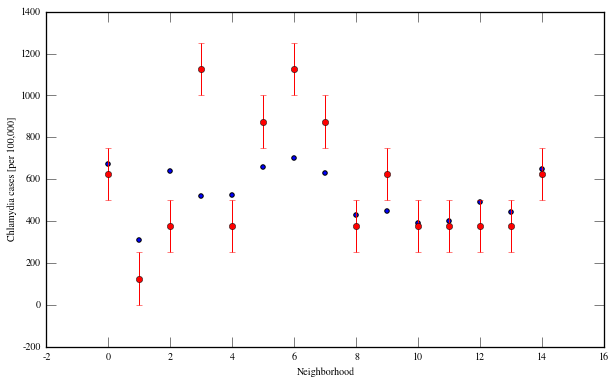

In [111]:
fig = plt.figure(figsize=(10, 6))
data = np.arange(len(df_boston_rates['Neighborhood']))
ax1 = plt.scatter(data,predictions)
plt.xlabel("Neighborhood")
plt.ylabel("Chlamydia cases [per 100,000]")
ax2 = plt.errorbar(data, df_boston_rates["mean"], yerr=df_boston_rates["error"],fmt='o', color='red')
plt.savefig('../graphics/boston_comparison.png', bbox_inches='tight', dpi=150)